# Web Scraping Project

**About**: This project is part of my course "Tools in Data Science" as part of B.Sc. in Programming and Data Science by IIT Madras.<br>
**Aim**: To scrape data from the given website, analyse it and hence answer the questions posed.<br>
**Website to scrape**: https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00114.htm

In [1]:
from bs4 import BeautifulSoup as bs
import requests #to access website
import pandas as pd

In [2]:
r = requests.get("https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00114.htm")

# Convert to a beautiful soup object
soup = bs(r.content)

# Print out HTML
contents = soup.prettify()
print(contents[:100])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtm


In [3]:
final_data = []
full_list = []

In [4]:
vote_table = soup.find(class_="newspaperDisplay_3column")
for row in vote_table:
    full_list.append(row.text.split("\n"))
full_list

[['', ''],
 ['Baldwin (D-WI), Yea',
  'Barrasso (R-WY), Nay',
  'Bennet (D-CO), Yea',
  'Blackburn (R-TN), Nay',
  'Blumenthal (D-CT), Yea',
  'Blunt (R-MO), Yea',
  'Booker (D-NJ), Yea',
  'Boozman (R-AR), Nay',
  'Braun (R-IN), Nay',
  'Brown (D-OH), Yea',
  'Burr (R-NC), Yea',
  'Cantwell (D-WA), Yea',
  'Capito (R-WV), Yea',
  'Cardin (D-MD), Yea',
  'Carper (D-DE), Yea',
  'Casey (D-PA), Yea',
  'Cassidy (R-LA), Yea',
  'Collins (R-ME), Yea',
  'Coons (D-DE), Yea',
  'Cornyn (R-TX), Yea',
  'Cortez Masto (D-NV), Yea',
  'Cotton (R-AR), Nay',
  'Cramer (R-ND), Nay',
  'Crapo (R-ID), Nay',
  'Cruz (R-TX), Nay',
  'Daines (R-MT), Nay',
  'Duckworth (D-IL), Yea',
  'Durbin (D-IL), Yea',
  'Ernst (R-IA), Yea',
  'Feinstein (D-CA), Yea',
  'Fischer (R-NE), Nay',
  'Gillibrand (D-NY), Yea',
  'Graham (R-SC), Yea',
  'Grassley (R-IA), Yea',
  'Hagerty (R-TN), Nay',
  'Hassan (D-NH), Yea',
  'Hawley (R-MO), Nay',
  'Heinrich (D-NM), Yea',
  'Hickenlooper (D-CO), Yea',
  'Hirono (D-HI), Yea

In [5]:
for item in full_list[1]:
    final_data.append(item.split(" "))
final_data

[['Baldwin', '(D-WI),', 'Yea'],
 ['Barrasso', '(R-WY),', 'Nay'],
 ['Bennet', '(D-CO),', 'Yea'],
 ['Blackburn', '(R-TN),', 'Nay'],
 ['Blumenthal', '(D-CT),', 'Yea'],
 ['Blunt', '(R-MO),', 'Yea'],
 ['Booker', '(D-NJ),', 'Yea'],
 ['Boozman', '(R-AR),', 'Nay'],
 ['Braun', '(R-IN),', 'Nay'],
 ['Brown', '(D-OH),', 'Yea'],
 ['Burr', '(R-NC),', 'Yea'],
 ['Cantwell', '(D-WA),', 'Yea'],
 ['Capito', '(R-WV),', 'Yea'],
 ['Cardin', '(D-MD),', 'Yea'],
 ['Carper', '(D-DE),', 'Yea'],
 ['Casey', '(D-PA),', 'Yea'],
 ['Cassidy', '(R-LA),', 'Yea'],
 ['Collins', '(R-ME),', 'Yea'],
 ['Coons', '(D-DE),', 'Yea'],
 ['Cornyn', '(R-TX),', 'Yea'],
 ['Cortez', 'Masto', '(D-NV),', 'Yea'],
 ['Cotton', '(R-AR),', 'Nay'],
 ['Cramer', '(R-ND),', 'Nay'],
 ['Crapo', '(R-ID),', 'Nay'],
 ['Cruz', '(R-TX),', 'Nay'],
 ['Daines', '(R-MT),', 'Nay'],
 ['Duckworth', '(D-IL),', 'Yea'],
 ['Durbin', '(D-IL),', 'Yea'],
 ['Ernst', '(R-IA),', 'Yea'],
 ['Feinstein', '(D-CA),', 'Yea'],
 ['Fischer', '(R-NE),', 'Nay'],
 ['Gillibrand', '(D

In [6]:
#Fixing cases with 2 words in the name
for i in range(len(final_data)):
    if len(final_data[i]) == 4:
        temp=final_data[i][0]+" "+final_data[i][1]
        new_row = []
        new_row.append(temp)
        new_row.append(final_data[i][2])
        new_row.append(final_data[i][3])
        final_data[i] = new_row.copy()
final_data

[['Baldwin', '(D-WI),', 'Yea'],
 ['Barrasso', '(R-WY),', 'Nay'],
 ['Bennet', '(D-CO),', 'Yea'],
 ['Blackburn', '(R-TN),', 'Nay'],
 ['Blumenthal', '(D-CT),', 'Yea'],
 ['Blunt', '(R-MO),', 'Yea'],
 ['Booker', '(D-NJ),', 'Yea'],
 ['Boozman', '(R-AR),', 'Nay'],
 ['Braun', '(R-IN),', 'Nay'],
 ['Brown', '(D-OH),', 'Yea'],
 ['Burr', '(R-NC),', 'Yea'],
 ['Cantwell', '(D-WA),', 'Yea'],
 ['Capito', '(R-WV),', 'Yea'],
 ['Cardin', '(D-MD),', 'Yea'],
 ['Carper', '(D-DE),', 'Yea'],
 ['Casey', '(D-PA),', 'Yea'],
 ['Cassidy', '(R-LA),', 'Yea'],
 ['Collins', '(R-ME),', 'Yea'],
 ['Coons', '(D-DE),', 'Yea'],
 ['Cornyn', '(R-TX),', 'Yea'],
 ['Cortez Masto', '(D-NV),', 'Yea'],
 ['Cotton', '(R-AR),', 'Nay'],
 ['Cramer', '(R-ND),', 'Nay'],
 ['Crapo', '(R-ID),', 'Nay'],
 ['Cruz', '(R-TX),', 'Nay'],
 ['Daines', '(R-MT),', 'Nay'],
 ['Duckworth', '(D-IL),', 'Yea'],
 ['Durbin', '(D-IL),', 'Yea'],
 ['Ernst', '(R-IA),', 'Yea'],
 ['Feinstein', '(D-CA),', 'Yea'],
 ['Fischer', '(R-NE),', 'Nay'],
 ['Gillibrand', '(D-NY

In [7]:
#Removing the empty values at the end
del final_data[-2:]

In [8]:
#Extracting party from the second column
for i in range(len(final_data)):
    temp1=final_data[i][1][1]
    temp2=final_data[i][1][3]+final_data[i][1][4]
    new_row = []
    new_row.append(final_data[i][0])
    new_row.append(temp1)
    new_row.append(temp2)
    new_row.append(final_data[i][2])
    final_data[i] = new_row.copy()
final_data

[['Baldwin', 'D', 'WI', 'Yea'],
 ['Barrasso', 'R', 'WY', 'Nay'],
 ['Bennet', 'D', 'CO', 'Yea'],
 ['Blackburn', 'R', 'TN', 'Nay'],
 ['Blumenthal', 'D', 'CT', 'Yea'],
 ['Blunt', 'R', 'MO', 'Yea'],
 ['Booker', 'D', 'NJ', 'Yea'],
 ['Boozman', 'R', 'AR', 'Nay'],
 ['Braun', 'R', 'IN', 'Nay'],
 ['Brown', 'D', 'OH', 'Yea'],
 ['Burr', 'R', 'NC', 'Yea'],
 ['Cantwell', 'D', 'WA', 'Yea'],
 ['Capito', 'R', 'WV', 'Yea'],
 ['Cardin', 'D', 'MD', 'Yea'],
 ['Carper', 'D', 'DE', 'Yea'],
 ['Casey', 'D', 'PA', 'Yea'],
 ['Cassidy', 'R', 'LA', 'Yea'],
 ['Collins', 'R', 'ME', 'Yea'],
 ['Coons', 'D', 'DE', 'Yea'],
 ['Cornyn', 'R', 'TX', 'Yea'],
 ['Cortez Masto', 'D', 'NV', 'Yea'],
 ['Cotton', 'R', 'AR', 'Nay'],
 ['Cramer', 'R', 'ND', 'Nay'],
 ['Crapo', 'R', 'ID', 'Nay'],
 ['Cruz', 'R', 'TX', 'Nay'],
 ['Daines', 'R', 'MT', 'Nay'],
 ['Duckworth', 'D', 'IL', 'Yea'],
 ['Durbin', 'D', 'IL', 'Yea'],
 ['Ernst', 'R', 'IA', 'Yea'],
 ['Feinstein', 'D', 'CA', 'Yea'],
 ['Fischer', 'R', 'NE', 'Nay'],
 ['Gillibrand', 'D', '

In [9]:
df = pd.DataFrame(final_data,columns = ["Name","Party","State","Vote"])
print(df)

          Name Party State Vote

0      Baldwin     D    WI  Yea

1     Barrasso     R    WY  Nay

2       Bennet     D    CO  Yea

3    Blackburn     R    TN  Nay

4   Blumenthal     D    CT  Yea

..         ...   ...   ...  ...

95      Warren     D    MA  Yea

96  Whitehouse     D    RI  Yea

97      Wicker     R    MS  Nay

98       Wyden     D    OR  Yea

99       Young     R    IN  Nay



[100 rows x 4 columns]


In [10]:
#Converting to a csv for further analysis, run the below line
#df.to_csv("voting_data.csv")

# Questions:

**Q1**: How many democrats didn't vote? <br>
Ans: 0

**Q2**: How many republicans voted "Yea"?<br>
Ans: 20

**Q3**: What's the total number of Yea votes from all senators whose name starts with "B"?<br>
Ans: 7

**Q4**: How many states voted all "Yea"?<br>
Ans: 30

**Q5**: How many states had atleast one non-voting senator? <br>
Ans: 0

**Q6**: How many states have both Republican senators?<br>
Ans: 22

**Q7**: How many states have both Republlican and Democratic senators?<br>
Ans: 5

**Q8**: How many senators have their names starting with "W"?<br>
Ans: 6

**Q9**: What is the votes ratio of Democrats' major decision to Republicans' major decision ?<br>
Ans: 0.97

**Q10**: What is the highest absolute difference in percentage between yea and nay senators among the different parties?<br>
Ans: 100

**Q11**: How many Democrats voted "Yea"?<br>
Ans: 48

**Q12**: How many states voted all "Nay"?<br>
Ans: 10

**Q13**: How many states have both Democrat senators?<br>
Ans: 21

**Q14**: How many senators did not vote?<br>
Ans: 0

**Q15**: How many states had atleast 1 senator not voted?<br>
Ans: 0

**Q16**: What is the ratio of number of rows to the number of columns in your dataset?<br>
Ans: 25

# Graph Analysis

**Graph 1**: Stacked Bar for *Parties* versus *Number of Votes*

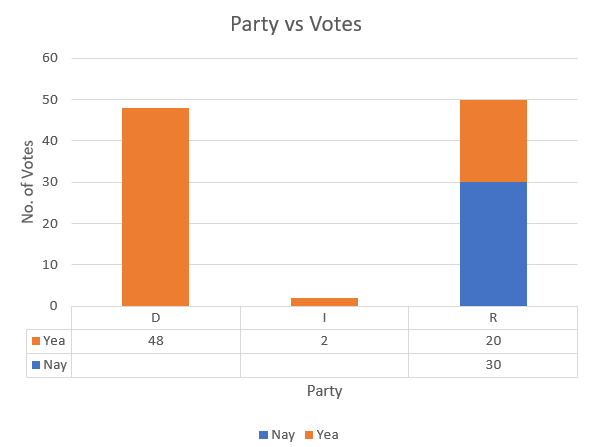

**Graph 2**: Pie Chart of *Republican Votes*

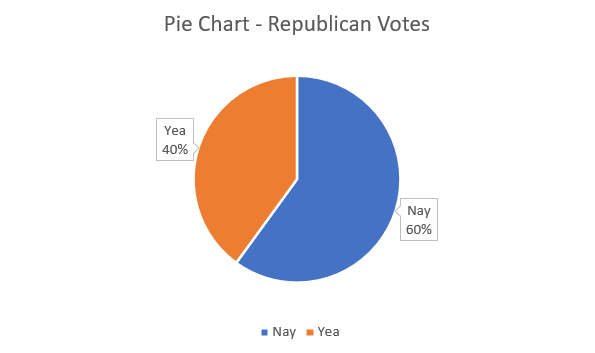

**Graph 3**: Heat Tab for *Parties* versus *Yea/Nay*

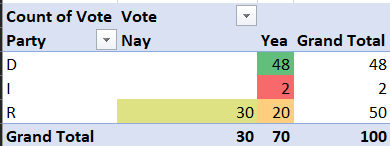

**Graph 4**: Pie chart of *Majority across States*

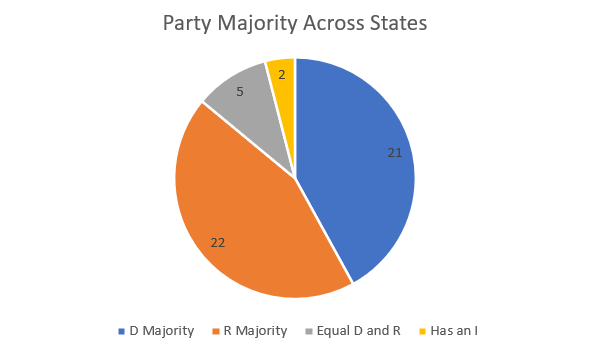